## Reading the book content without header and footer section and writing the content to another text file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Text Generation using Sherlock book/NLP task.txt'
fhandle = open(path, encoding="utf8")
for line in fhandle:
    if line.rstrip() == "*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***":
        break
write_path = '/content/drive/MyDrive/Text Generation using Sherlock book/NLP_book.txt'
output_file = open(write_path, 'w')
for line in fhandle:
    if line.rstrip() == "*** END OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***":
        break;
    output_file.write(line)   
output_file.close()
fhandle.close()

In [3]:
text = open(write_path, 'r', encoding='utf8').read()
text = text.lower()
unique_chars = set(text)

print("Total number of characters in the book: ", len(text))
print("Total number of words in the book: ", len(text.split()))
print("Total number of unique characters:" ,len(unique_chars))

Total number of characters in the book:  562371
Total number of words in the book:  104530
Total number of unique characters: 62


In [4]:
char_dict = {}
for index, char in enumerate(unique_chars):
    char_dict[char] = index

In [5]:
char_dict.items()

dict_items([('b', 0), ('q', 1), ('\n', 2), ('y', 3), ('5', 4), ('v', 5), ('i', 6), ('w', 7), ('è', 8), ('l', 9), ('k', 10), ('é', 11), ('.', 12), ('œ', 13), ('’', 14), ('e', 15), ('8', 16), ('‘', 17), ('t', 18), ('à', 19), ('?', 20), (';', 21), ('&', 22), ('“', 23), ('u', 24), ('!', 25), ('4', 26), ('h', 27), ('f', 28), ('_', 29), (')', 30), ('æ', 31), (':', 32), ('-', 33), ('”', 34), ('c', 35), ('s', 36), ('0', 37), ('m', 38), ('r', 39), ('z', 40), (',', 41), ('£', 42), ('7', 43), ('a', 44), ('3', 45), ('½', 46), ('p', 47), ('â', 48), ('9', 49), ('o', 50), ('j', 51), ('2', 52), ('x', 53), (' ', 54), ('(', 55), ('d', 56), ('1', 57), ('g', 58), ('—', 59), ('6', 60), ('n', 61)])

In [39]:
int_to_char_dict = {}
for k, v in char_dict.items():
  int_to_char_dict[v] = k

In [40]:
int_to_char_dict.items()

dict_items([(0, 'b'), (1, 'q'), (2, '\n'), (3, 'y'), (4, '5'), (5, 'v'), (6, 'i'), (7, 'w'), (8, 'è'), (9, 'l'), (10, 'k'), (11, 'é'), (12, '.'), (13, 'œ'), (14, '’'), (15, 'e'), (16, '8'), (17, '‘'), (18, 't'), (19, 'à'), (20, '?'), (21, ';'), (22, '&'), (23, '“'), (24, 'u'), (25, '!'), (26, '4'), (27, 'h'), (28, 'f'), (29, '_'), (30, ')'), (31, 'æ'), (32, ':'), (33, '-'), (34, '”'), (35, 'c'), (36, 's'), (37, '0'), (38, 'm'), (39, 'r'), (40, 'z'), (41, ','), (42, '£'), (43, '7'), (44, 'a'), (45, '3'), (46, '½'), (47, 'p'), (48, 'â'), (49, '9'), (50, 'o'), (51, 'j'), (52, '2'), (53, 'x'), (54, ' '), (55, '('), (56, 'd'), (57, '1'), (58, 'g'), (59, '—'), (60, '6'), (61, 'n')])

## Training char-by-char with a sliding window of 80 characters at a time

In [6]:
window_len = 80
input_seq = []
output_seq = []
for i in range(0, len(text) - window_len, 1):
    seq_in = text[i:i + window_len]
    seq_out = text[i + window_len]
    input_seq.append([char_dict[char] for char in seq_in])
    output_seq.append(char_dict[seq_out])

In [7]:
print("Length of input characters: ", len(input_seq))
print("Length of output sequence: ", len(output_seq))
print("Length of each sequence in input sequence: ", len(input_seq[0]))

Length of input characters:  562291
Length of output sequence:  562291
Length of each sequence in input sequence:  80


## Transforming the input and output sequences into one hot encoded vectors

In [8]:
from keras.utils import np_utils
import numpy as np

# reshape X to be [samples, time steps, features]
X = np.reshape(input_seq, (len(input_seq), window_len, 1))

# normalize
X = X / float(len(unique_chars))

# one hot encode the output variable
y = np_utils.to_categorical(output_seq)

## Creating the sequential LSTM Model

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf

In [21]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [25]:
filepath="../logs/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [27]:
history_ = model.fit(X, y, epochs=25, batch_size=512, callbacks=callbacks_list)

Epoch 1/25
1099/1099 [==============================] - 92s 82ms/step - loss: 3.0470

Epoch 00001: loss improved from inf to 2.96716, saving model to ../logs/weights-improvement-01-2.9672.hdf5
Epoch 2/25
1099/1099 [==============================] - 89s 81ms/step - loss: 2.6999

Epoch 00002: loss improved from 2.96716 to 2.59922, saving model to ../logs/weights-improvement-02-2.5992.hdf5
Epoch 3/25
1099/1099 [==============================] - 89s 81ms/step - loss: 2.3755

Epoch 00003: loss improved from 2.59922 to 2.32802, saving model to ../logs/weights-improvement-03-2.3280.hdf5
Epoch 4/25
1099/1099 [==============================] - 89s 81ms/step - loss: 2.2106

Epoch 00004: loss improved from 2.32802 to 2.18634, saving model to ../logs/weights-improvement-04-2.1863.hdf5
Epoch 5/25
1099/1099 [==============================] - 89s 81ms/step - loss: 2.1049

Epoch 00005: loss improved from 2.18634 to 2.08840, saving model to ../logs/weights-improvement-05-2.0884.hdf5
Epoch 6/25
1099/109

In [28]:
history_.history

{'loss': [2.967164993286133,
  2.599224805831909,
  2.328023910522461,
  2.1863412857055664,
  2.088399648666382,
  2.014918327331543,
  1.9636296033859253,
  1.918687343597412,
  1.8859351873397827,
  1.8573904037475586,
  1.8304370641708374,
  1.8078471422195435,
  1.7864060401916504,
  1.769704818725586,
  1.7526977062225342,
  1.7388808727264404,
  1.726637363433838,
  1.7119840383529663,
  1.7009505033493042,
  1.6896486282348633,
  1.6777474880218506,
  1.6680729389190674,
  1.660649299621582,
  1.650329828262329,
  1.6429623365402222]}

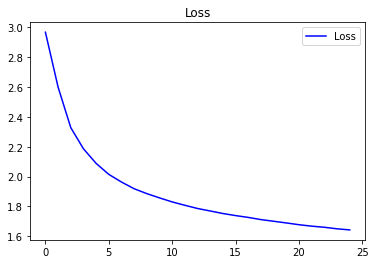

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
loss = history_.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [41]:
start = np.random.randint(0, len(input_seq)-1)
pattern = input_seq[start]
''.join([int_to_char_dict[val] for val in pattern])

't his whole debts at the present moment,\nas far as we have been able to ascertai'

In [47]:
import sys
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(len(unique_chars))
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char_dict[index]
	seq_in = [int_to_char_dict[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]

n the sort to the cort of the
sorpner and the sore to the cort to the cort to the cort to the sore
monty uoon the sort to the cort to the cort to the cort to the come of
the sort to the cort to the cort to the cort to the cort to the sore
monty uoon the sort to the cort to the cort to the cort to the come of
the sort to the cort to the cort to the cort to the cort to the sore
monty uoon the sort to the cort to the cort to the cort to the come of
the sort to the cort to the cort to the cort to the cort to the sore
monty uoon the sort to the cort to the cort to the cort to the come of
the sort to the cort to the cort to the cort to the cort to the sore
monty uoon the sort to the cort to the cort to the cort to the come of
the sort to the cort to the cort to the cort to the cort to the sore
monty uoon the sort to the cort to the cort to the cort to the come of
the sort to the cort to the cort to the cort to the cort to the sore
monty uoon the sort to the cort to the cort to the cort to th